In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pickle
import joblib
import seaborn as sns


In [4]:
df = pd.read_csv('2020/heart_2020_cleaned.csv')

# Data Preprocessing

In [6]:
# Label Encoding for binary categorical features
binary_cols = [
    "HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
    "Sex", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma",
    "KidneyDisease", "SkinCancer"
]

label_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode categorical values
    label_encoders[col] = le

# Save label encoders to a file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# One-Hot Encoding for multi-class categorical variables
df = pd.get_dummies(df, columns=["AgeCategory", "Race"], drop_first=True)

# Save encoded column structure for future use
with open('encoded_columns.pkl', 'wb') as f:
    pickle.dump(list(df.columns), f)


In [30]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,2,...,False,False,False,False,False,False,False,False,False,True
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
2,0,26.58,1,0,0,20.0,30.0,0,1,2,...,False,True,False,False,False,False,False,False,False,True
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,2,...,True,False,False,False,False,False,False,True,False,False
319791,0,29.84,1,0,0,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
319792,0,24.24,0,0,0,0.0,0.0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
319793,0,32.81,0,0,0,0.0,0.0,0,0,0,...,False,False,False,False,False,False,False,True,False,False


# Split Data

In [8]:
X = df.drop(columns=["HeartDisease"])  
y = df["HeartDisease"]  

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model

In [11]:
# Initialize Logistic Regression model
model =RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
joblib.dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

# Model Performance Visulization

In [16]:
# Predict on test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9034


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.12      0.18      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



In [22]:
# Confusion Matrix
cf = confusion_matrix(y_test, y_pred)

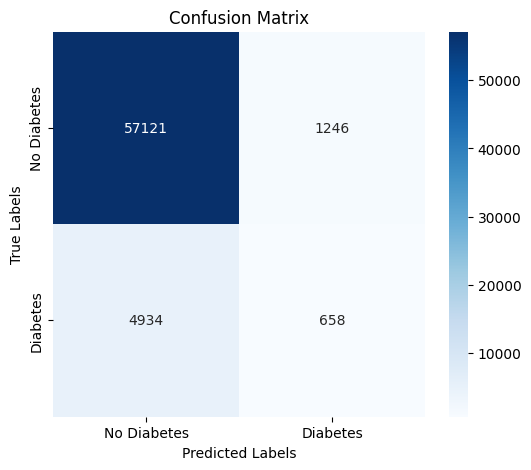

In [28]:
# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()